In [11]:
%config ZMQInteractiveShell.ast_node_interactivity = 'all'


PCA使用的信息量衡量指标，就是样本方差，又称可解释性方差，方差越大，特征所带的信息量越多。

SVD使用奇异值来衡量特征上的信息量的指标。

在数学原理中，无论是PCA和SVD都需要遍历所有的特征和样本来计算信息量指标。

降维完毕后的特征不是原本的特征矩阵中的任何一个特征，而是通过某 些方式组合起来的新特征。通常来说，在新的特征矩阵生成之前，我们无法知晓PCA都建立了怎样的新特征向 量，新特征矩阵生成之后也不具有可读性，我们无法判断新特征矩阵的特征是从原数据中的什么特征组合而 来，新特征虽然带有原始数据的信息，却已经不是原数据上代表着的含义了。以PCA为代表的降维算法因此是 特征创造（feature creation，或feature construction）的一种

In [12]:
class sklearn.decomposition.PCA (n_components=None, 
                                 copy=True, 
                                 whiten=False, 
                                 svd_solver=’auto’, 
                                 tol=0.0, 
                                 iterated_power=’auto’, 
                                 random_state=None) 

SyntaxError: invalid syntax (<ipython-input-12-59929c75edcb>, line 1)

In [37]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data# (150, 4)
y = iris.target
df_X = pd.DataFrame(X)
y == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
pca2 = PCA(n_components=2)
pca2 = pca2.fit(X)
X_dr2 = pca2.transform(X)

pca3 = PCA(n_components=3)
pca3 = pca3.fit(X)
X_dr3 = pca3.transform(X)

X_dr2
X_dr3

In [ ]:
colors = ['red','green','blue']
iris.target_names

plt.figure()
for i in [0,1,2]:
    plt.scatter(X_dr[y==i,0],X_dr[y==i,1],alpha=0.7,c=colors[i],label=iris.target_names[i])
plt.legend()
plt.title('PCA of iris ')
plt.show()

In [ ]:
# explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小） 
pca.explained_variance_

#explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
pca.explained_variance_ratio_


pca.explained_variance_ratio_.sum()

([<matplotlib.axis.XTick at 0x7f3ebe5244a8>,
 <a list of 4 Text xticklabel objects>)

Text(0.5, 0, 'number of components after dimension reduction')

Text(0, 0.5, 'cumulative explained variance ratio')

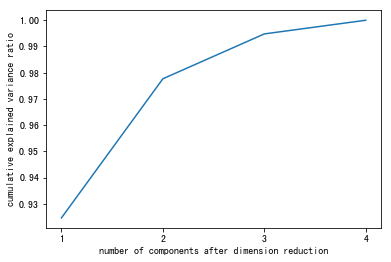

In [38]:
# 画曲线得最佳 components值
# 累积可解释方差贡献率曲线
import numpy as np
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative explained variance ratio')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=100,random_state=0)
cross_val_score(rfc,X,y,cv=5).mean()
cross_val_score(rfc,X_dr2,y,cv=5).mean()
cross_val_score(rfc,X_dr3,y,cv=5).mean()

In [ ]:
# 最大似然 选择超参数
pca_mle = PCA(n_components='mle')
X_mle = pca_mle.fit_transform(X)
X_mle
pca_mle.explained_variance_ratio_.sum()

In [ ]:
# 按信息量占比 选择超参数
pca_f = PCA(n_components=0.97,svd_solver='full')
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
X_f
pca_f.explained_variance_ratio_.sum()

SVD在矩阵分解中的过程比PCA简单快速，虽然两个算法都走一样的分解流程，但SVD可以作弊耍赖直 接算出V。但是遗憾的是，SVD的信息量衡量指标比较复杂，要理解”奇异值“远不如理解”方差“来得容易，

因此， sklearn将降维流程拆成了两部分：

一部分是计算特征空间V，由奇异值分解完成，

另一部分是映射数据和求解新特征矩阵，由主成分分析完成，实现了用SVD的性质减少计算量，却让信息量的评估指标是方差
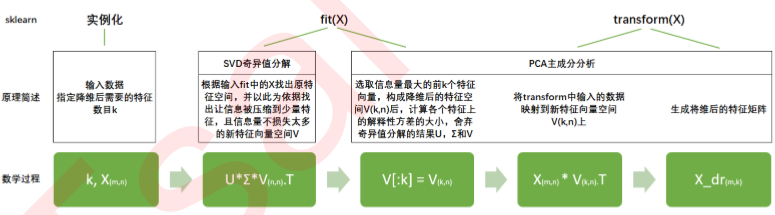


In [ ]:

PCA(2).fit(X).components_
 
PCA(2).fit(X).components_.shape 

关于 scd_solver 参数：

"auto"：基于X.shape和n_components的默认策略来选择分解器

"full"：适合数据量比较适中，计算时 间充足的情况

"arpack"：可以加快运算速度，适合特征矩阵很大的时候，但一般用于 特征矩阵为稀疏矩阵的情况

"randomized"：适合特征矩阵巨大，计算量庞大的情况。比full快

random_state 只在使用arpack或randomized时生效，用以指定随机模式

# 人脸识别中的应用

In [8]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people 
import matplotlib.pyplot as plt
import numpy as np

In [44]:
faces= fetch_lfw_people(min_faces_per_person=60)

# PCA噪声过滤
利用inverse_transform的特性进行操作

In [16]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [18]:
digits = load_digits()
digits.data.shape#(1797, 64)

(1797, 64)

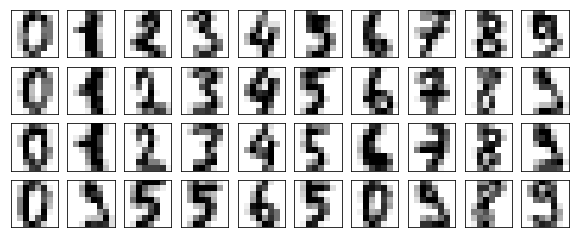

In [22]:
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4),
                           subplot_kw = {"xticks":[],"yticks":[]}
                           )
    for i,ax in enumerate(axes.flat):
        #ax.imshow(data[i].shape(8,8),cmap="binary")
        ax.imshow(data[i].reshape(8,8),cmap="binary")
plot_digits(digits.data)

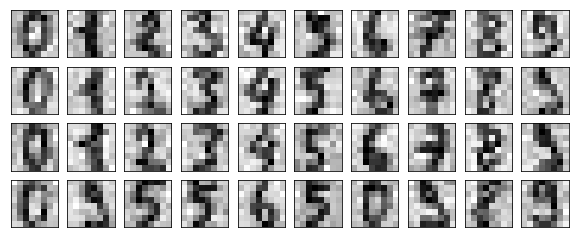

In [24]:
# 添加噪音
np.random.RandomState(42)
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

In [27]:
# 降维
pca = PCA(0.5).fit(noisy)
noisy_dr = pca.transform(noisy)
noisy_dr.shape

(1797, 6)

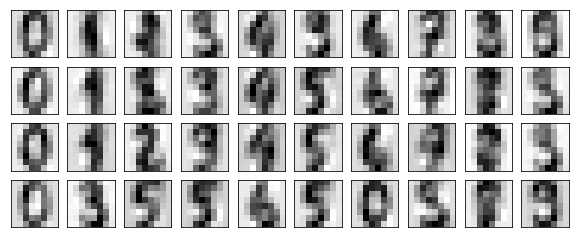

In [28]:
noisy_free = pca.inverse_transform(noisy_dr)
plot_digits(noisy_free)

# 手写数字识别的降维处理

In [30]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
data = pd.read_csv('digit recognizor.csv')

In [41]:
data.head()
y = data.iloc[:,0]
X = data.iloc[:,1:]
X.shape

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 784)

<Figure size 1440x360 with 0 Axes>

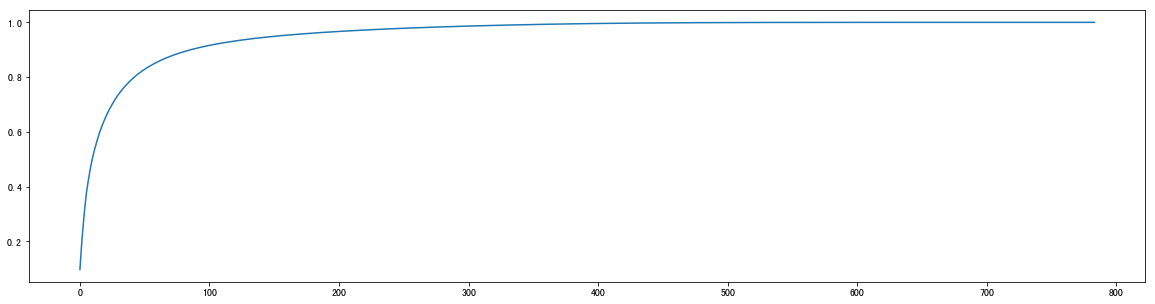

In [42]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.show()

<Figure size 1440x360 with 0 Axes>

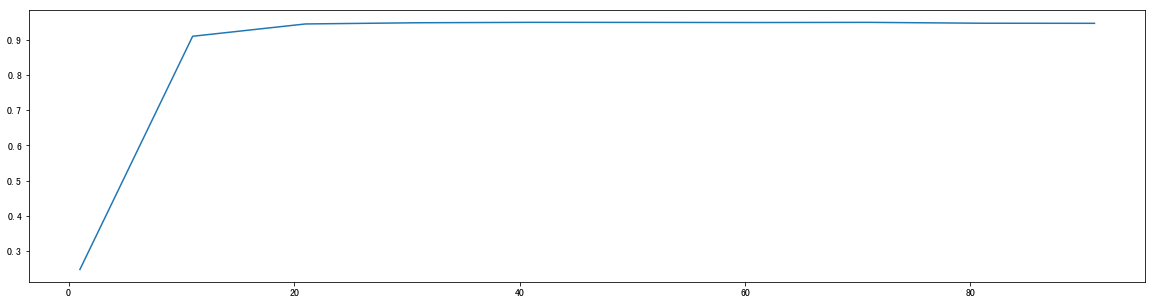

In [43]:
score = []
for i in range(1,101,10):
    #X_dr = PCA(i).fit_transform(X)
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

In [ ]:
score = []
for i in range(10,25):
    #X_dr = PCA(i).fit_transform(X)
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [ ]:
X_dr = PCA(23).fit_transform(X)

cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

In [ ]:
# 使用KNN模型进行拟合
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()
